In [30]:
import os
from dotenv import load_dotenv
load_dotenv()
from langchain_groq import ChatGroq

os.environ["GROQ_API_KEY"]=os.getenv("GROQ_API_KEY")

llm=ChatGroq(model="llama-3.1-8b-instant")

In [39]:
from langgraph.graph import StateGraph, START, END
from typing_extensions import TypedDict

class State(TypedDict):
    topic:str
    characters: str
    plot: str
    premises:str
    story_intro:str

In [40]:
def generate_characters(state: State):
    msg = llm.invoke(f"Create two character names and brief traits for a story about {state['topic']}")
    return {"characters": msg.content}

def generate_plot(state: State):
    msg = llm.invoke(f"Describe a vivid plot for a story about {state['topic']}")
    return {"plot": msg.content}

def generate_premise(state: State):
    """Generate a story premise"""
    msg = llm.invoke(f"Write a one-sentence plot premise for a story about {state['topic']}")
    return {"premises": msg.content}

In [41]:
def combine_elements(state:State):
    msg = llm.invoke(
        f"Write a short story introduction using these elements:\n"
        f"Characters: {state['characters']}\n"
        f"Plot: {state['plot']}\n"
        f"Premise: {state['premises']}"
    )
    return {"story_intro": msg.content}

In [42]:
graph_builder = StateGraph(State)

graph_builder.add_node("generate_characters",generate_characters)
graph_builder.add_node("generate_plot",generate_plot)
graph_builder.add_node("generate_premise",generate_premise)
graph_builder.add_node("combine_elements",combine_elements)

graph_builder.add_edge(START, "generate_characters")
graph_builder.add_edge(START, "generate_plot")
graph_builder.add_edge(START, "generate_premise")
graph_builder.add_edge("generate_characters", "combine_elements")
graph_builder.add_edge("generate_plot", "combine_elements")
graph_builder.add_edge("generate_premise", "combine_elements")
graph_builder.add_edge("combine_elements",END)

graph = graph_builder.compile()



In [43]:
from IPython.display import Image, display

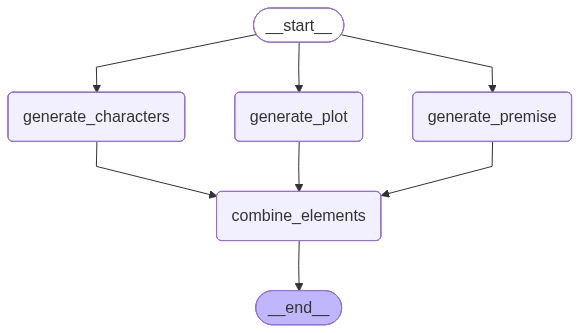

In [44]:
graph_image = graph.get_graph().draw_mermaid_png()
display(Image(graph_image))

In [45]:
state = {"topic": "mahabharatam"}
result = graph.invoke(state)
print(result)

{'topic': 'mahabharatam', 'characters': "Here are two character names with brief traits related to the Mahabharatam:\n\n1. **Name:** Arjunesh\n**Traits:** Arjunesh is a young and ambitious warrior from the Pandavas' side. He is brave, fiercely loyal to his family, and determined to reclaim their kingdom from the Kauravas. Despite his valiant efforts, Arjunesh often struggles with self-doubt and the weight of his responsibilities.\n\n2. **Name:** Vrindaraj\n**Traits:** Vrindaraj is a wise and enigmatic sage who serves as a spiritual advisor to both the Pandavas and the Kauravas. With his profound knowledge of the ancient scriptures and his deep understanding of the human heart, Vrindaraj navigates the complex web of alliances and rivalries between the warring factions. His calm demeanor and insightful counsel often help to temper the passions of those around him, but his own motivations remain shrouded in mystery.", 'plot': '**Title: The Lost Chronicles of the Pandavas**\n\n**Setting:**

In [46]:
print(result["story_intro"])

In the sweltering heat of the Indian summer, the kingdom of Hastinapura was on the brink of chaos. The war drums beat louder with each passing day, as the Pandavas, a family of five brothers, prepared to face off against their treacherous cousins, the Kauravas. Amidst the tumultuous events, a young and ambitious warrior named Arjunesh, son of Arjuna, stood tall, his heart burning with a fierce determination to reclaim his family's kingdom.

As he walked through the bustling streets of Hastinapura, Arjunesh's thoughts were consumed by the prophecy of the Raghuvamsa Purana, a long-forgotten text that spoke of a magical amulet hidden within the palace. The amulet, said to grant invincibility to its wearer, was the key to tipping the scales in their favor during the impending war. With a deep breath, Arjunesh steeled himself for the perilous journey ahead, little knowing that he was about to unravel a deeper mystery that would change the course of his life forever.

In a distant corner of 